### Module 14 - Case study 2

1. Load the data from “glass.csv” and make a bar plot of different types of glasses.

2. Make a train_test split and fit a single decision tree classifier.

3. Make a k-fold split with 3 splits and measure the accuracy score with each split

[Hint: Refer to KFold module under sklearn’s model selection.]

4. Use gridSearchCV from sklearn for finding out a suitable number of estimators for a RandomForestClassifer along with a 10-fold cross validation.

[Hint: Define a range of estimators and feed in range as param_grid]

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\sreeraj.va\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##### 1. Load the data from “glass.csv” and make a bar plot of different types of glasses.

In [3]:
df = pd.read_csv(r'D:\E\Courses\Edureka\Assignments\Dataset\14. Model Selection and Boosting\glass.csv')

In [4]:
print(df.shape)
df.head(2)

(214, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


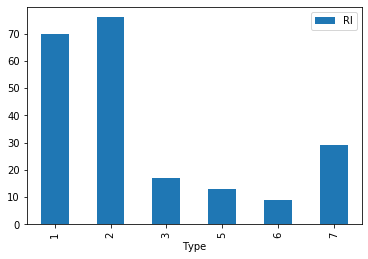

In [19]:
df.groupby(['Type']).agg({'RI':'count'}).plot(kind='bar')

##### 2. Make a train_test split and fit a single decision tree classifier.

In [8]:
x = df.iloc[:,0:9].values
y = df.iloc[:,9].values

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [10]:
len(x_train), len(x_test), len(y_train), len(y_test)

(171, 43, 171, 43)

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()

In [14]:
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
y_pred = dt_classifier.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [21]:
confusion_matrix(y_test, y_pred)

array([[ 5,  3,  1,  0,  0,  0],
       [ 6, 11,  1,  0,  0,  1],
       [ 2,  2,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  6]], dtype=int64)

In [22]:
accuracy_score(y_test, y_pred)

0.6046511627906976

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.38      0.56      0.45         9
           2       0.65      0.58      0.61        19
           3       0.33      0.20      0.25         5
           5       1.00      1.00      1.00         2
           6       1.00      0.50      0.67         2
           7       0.86      1.00      0.92         6

    accuracy                           0.60        43
   macro avg       0.70      0.64      0.65        43
weighted avg       0.62      0.60      0.60        43



##### 3. Make a k-fold split with 3 splits and measure the accuracy score with each split

In [24]:
from sklearn.model_selection import cross_val_score

In [26]:
accuracies = cross_val_score(estimator=dt_classifier, X=x_train, y=y_train, cv=3)

In [29]:
accuracies

array([0.68421053, 0.71929825, 0.68421053])

In [28]:
accuracies.mean()

0.6959064327485379

In [30]:
accuracies.std()

0.016540509501439708

All 3 splits accuracies are almost near the accuracy of the model. Also standard deviation is near to zero.

##### 4. Use gridSearchCV from sklearn for finding out a suitable number of estimators for a RandomForestClassifer along with a 10-fold cross validation.

In [31]:
# creating random forest classifier model

from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=10)

In [32]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
y_pred_rf =  rf_classifier.predict(x_test)

In [35]:
confusion_matrix(y_test, y_pred_rf)

array([[ 6,  3,  0,  0,  0,  0],
       [ 7, 10,  1,  0,  0,  1],
       [ 2,  1,  2,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 0,  1,  0,  0,  0,  5]], dtype=int64)

In [36]:
accuracy_score(y_test, y_pred_rf)

0.6046511627906976

In [37]:
# applying GridSearchCV

from sklearn.model_selection import GridSearchCV

In [72]:
est = list(range(21))
parameters = [{'n_estimators':est}]

In [73]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=parameters, scoring='accuracy')
grid_search.fit(x_train, y_train)

C:\Users\sreeraj.va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sreeraj.va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sreeraj.va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\sreeraj.va\Ap

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              ran

In [74]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [75]:
best_accuracy

0.7776470588235295

In [76]:
best_parameters

{'n_estimators': 12}

##### estimators=12 is giving the best accuracy with random frest classifier